## import libraries

In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## Data Preparation

In [2]:
#data augumentaion
train_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory('Train_data', 
                                           target_size = (128,128), 
                                           batch_size = 16,
                                           class_mode = 'categorical')

validation_data = train_gen.flow_from_directory('Validation_data', 
                                           target_size = (128,128), 
                                           batch_size = 16,
                                           class_mode = 'categorical')

Found 661 images belonging to 8 classes.
Found 168 images belonging to 8 classes.


## Model Building

In [3]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [128,128,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(8, activation = 'softmax'))


In [4]:
#print model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 64)                8388672   
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 8390088 (32.01 MB)
Trainable params: 8390088 (32.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

## Model Compilation

In [5]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model fit

In [6]:
model_history= cnn_model.fit(train_data, validation_data = validation_data,  epochs = 7)

Epoch 1/7
42/42 [==============================] - 36s 832ms/step - loss: 3.8442 - accuracy: 0.3132 - val_loss: 1.6820 - val_accuracy: 0.3512
Epoch 2/7
42/42 [==============================] - 35s 835ms/step - loss: 1.4130 - accuracy: 0.4902 - val_loss: 1.5514 - val_accuracy: 0.5060
Epoch 3/7
42/42 [==============================] - 34s 801ms/step - loss: 0.9085 - accuracy: 0.6989 - val_loss: 1.3439 - val_accuracy: 0.5952
Epoch 4/7
42/42 [==============================] - 34s 806ms/step - loss: 0.5246 - accuracy: 0.8442 - val_loss: 1.3323 - val_accuracy: 0.6250
Epoch 5/7
42/42 [==============================] - 34s 808ms/step - loss: 0.2671 - accuracy: 0.9531 - val_loss: 1.4540 - val_accuracy: 0.5952
Epoch 6/7
42/42 [==============================] - 33s 796ms/step - loss: 0.1318 - accuracy: 0.9788 - val_loss: 1.5290 - val_accuracy: 0.5774
Epoch 7/7
42/42 [==============================] - 34s 802ms/step - loss: 0.0666 - accuracy: 0.9924 - val_loss: 1.5591 - val_accuracy: 0.5952


In [7]:
test_score = cnn_model.evaluate(validation_data, verbose = 1)

11/11 [==============================] - 6s 521ms/step - loss: 1.5591 - accuracy: 0.5952


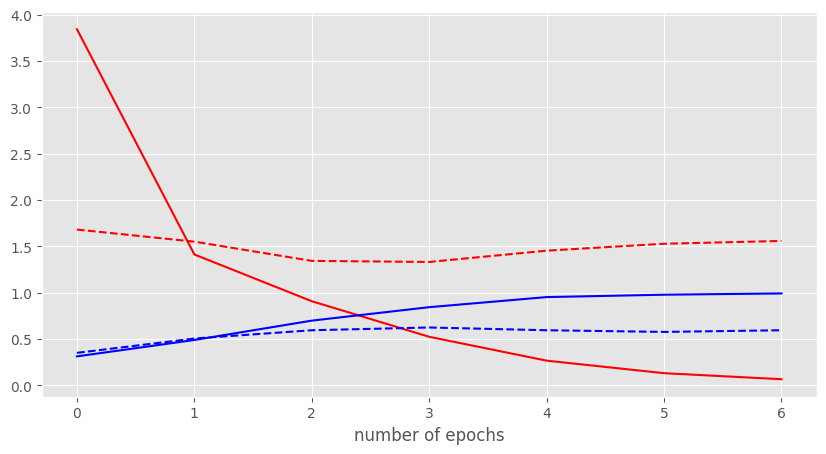

In [8]:
#plot history of loss and accuracy
hist = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

In [9]:
#test model
test_image_path = 'test_data/Fashion_16.png'

In [10]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
print(class_map)

{0: 'Accessories', 1: 'Artifacts', 2: 'Beauty', 3: 'Fashion', 4: 'Games', 5: 'Home', 6: 'Nutrition', 7: 'Stationary'}


In [13]:
def predictions(test_image_path, actual_label):

    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (128,128))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))

    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]


    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 78ms/step


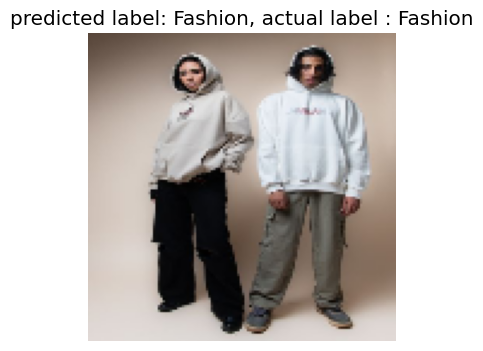

In [14]:
predictions(test_image_path, actual_label = 'Fashion')

In [16]:
#save model
cnn_model.save('slash_model.keras')